In [1]:
from fastai.data.all import *

In [2]:
from fastai.vision.all import *

In [3]:
from rhana.labeler.unet import *

In [4]:
from skimage import io as skm_io

In [5]:
import numpy as np

In [6]:
import pdb

# Fastai demo

# Load Data

In [218]:
training_data_folder = Path("../data/training_data")

In [219]:
df = pd.read_csv(training_data_folder / "semantic.csv")

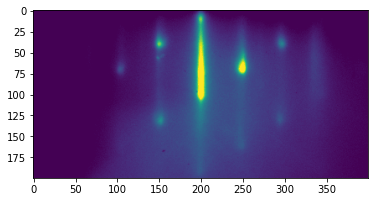

In [220]:
plt.imshow( plt.imread( training_data_folder / df.iloc[1]['Image'] ) )

In [221]:
df.iloc[1]['EncodedPixels']

'1001 1 1397 9 1796 11 2153 1 2195 13 2549 9 2594 15 2948 11 2994 15 3347 13 3394 15 3450 1 3746 15 3793 17 3846 9 4146 15 4193 17 4245 11 4546 15 4593 17 4644 13 4739 1 4945 17 4993 17 5043 15 5135 9 5345 17 5393 17 5443 15 5534 11 5745 17 5793 17 5843 15 5933 12 6145 17 6193 17 6242 17 6332 14 6545 17 6593 17 6642 17 6732 14 6945 17 6993 17 7042 17 7098 1 7132 15 7345 17 7393 17 7443 17 7494 9 7531 16 7745 17 7793 17 7843 17 7893 11 7931 17 8145 17 8193 17 8243 17 8292 12 8331 17 8545 17 8593 17 8643 17 8691 14 8731 17 8945 17 8993 17 9043 17 9091 14 9131 17 9345 17 9393 17 9443 17 9491 15 9531 17 9707 1 9745 17 9793 17 9843 17 9890 16 9931 17 10103 9 10145 17 10193 17 10243 17 10290 17 10331 17 10502 11 10545 17 10593 17 10643 17 10690 17 10731 17 10901 13 10945 17 10993 17 11043 17 11090 17 11131 17 11300 15 11345 17 11393 17 11443 17 11489 18 11531 17 11700 15 11746 17 11793 17 11843 17 11889 17 11932 16 12100 15 12146 17 12193 17 12243 17 12289 17 12331 17 12499 17 12546 17 12593

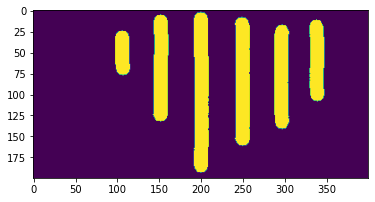

In [222]:
plt.imshow( rle_decode(df.iloc[1]['EncodedPixels'], (200, 400)),  )

In [223]:
df = df.pivot(index="Image", columns="Label", values="EncodedPixels")

In [224]:
root = training_data_folder
# root = training_data_folder.absolute()

In [225]:
import re

In [226]:
# the basic idea here is to label rheed in different experiment with a different code so that we can seperate them into train and validation set using this code.

# user might need to modify this
def get_exp_code(x):
    IT = Path(x).name.split("-")[0]
    if re.match(r"IT[0-9]+", IT):
        return IT
    else:
        # our name is come in a little bit unorganized
        # the one with not code is IT004
        return "IT004"

In [227]:
exp_code = np.unique( df.index.map(get_exp_code) )

In [228]:
exp_code

array(['IT003', 'IT004', 'IT006', 'IT008', 'IT009', 'IT010', 'IT011',
       'IT012', 'IT013', 'IT014', 'IT015', 'IT016', 'IT017', 'IT018'],
      dtype=object)

In [229]:
df.index = df.index.map( lambda x: os.path.join(root, x) )

In [230]:
row= df.iloc[0]; row

Label
spot                                                                                                                                                                                                                     6248 1 6646 5 7045 8 7444 9 7843 10 8243 10 8642 11 9042 10 9355 5 9442 10 9755 6 9842 10 10154 8 10242 10 10553 9 10642 10 10952 10 11042 9 11352 10 11443 7 11752 10 11844 6 12152 10 12552 9 12953 7 13354 5 16602 3 16999 9 17399 10 17797 13 18196 14 18596 14 18994 17 19394 17 19794 17 20194 17 20593 18 20993 18 21394 17 21794 17 22194 17 22594 16 22995 15 23397 12 23798 10 24199 8 24599 7
stripe    2200 5 2599 6 2936 1 2998 8 3334 5 3398 8 3465 5 3733 8 3798 9 3865 6 4133 8 4198 9 4264 8 4532 9 4598 9 4664 8 4932 9 4998 9 5063 9 5332 9 5398 9 5463 9 5732 9 5798 9 5863 9 6132 9 6198 9 6263 9 6532 9 6598 9 6663 9 6932 9 6998 9 7063 9 7332 9 7398 9 7463 9 7732 9 7798 9 7863 9 8132 9 8198 9 8263 9 8532 9 8598 9 8663 9 8932 9 8998 9 9063 9 9332 9 9398 9 9463 9 9732 9 979

# Create Dataset

In [231]:
img_path = df.index[0]

img = RHEEDTensorImage.create(img_path)
print(img)

RHEEDTensorImage: torch.Size([3, 200, 400])


<AxesSubplot:>

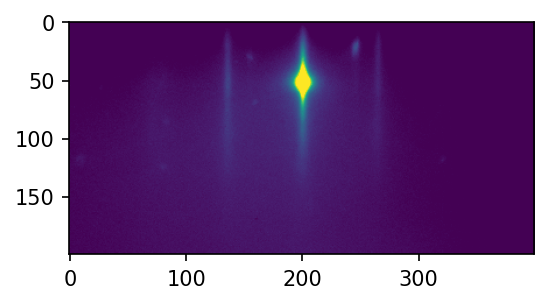

In [232]:
_, ax = plt.subplots(1, 1, figsize=(4, 8), dpi=150)
img.show(ctx=ax)

In [233]:
df

Label,spot,stripe
Image,,
../data/training_data/160p.png,6248 1 6646 5 7045 8 7444 9 7843 10 8243 10 8642 11 9042 10 9355 5 9442 10 9755 6 9842 10 10154 8 10242 10 10553 9 10642 10 10952 10 11042 9 11352 10 11443 7 11752 10 11844 6 12152 10 12552 9 12953 7 13354 5 16602 3 16999 9 17399 10 17797 13 18196 14 18596 14 18994 17 19394 17 19794 17 20194 17 20593 18 20993 18 21394 17 21794 17 22194 17 22594 16 22995 15 23397 12 23798 10 24199 8 24599 7,2200 5 2599 6 2936 1 2998 8 3334 5 3398 8 3465 5 3733 8 3798 9 3865 6 4133 8 4198 9 4264 8 4532 9 4598 9 4664 8 4932 9 4998 9 5063 9 5332 9 5398 9 5463 9 5732 9 5798 9 5863 9 6132 9 6198 9 6263 9 6532 9 6598 9 6663 9 6932 9 6998 9 7063 9 7332 9 7398 9 7463 9 7732 9 7798 9 7863 9 8132 9 8198 9 8263 9 8532 9 8598 9 8663 9 8932 9 8998 9 9063 9 9332 9 9398 9 9463 9 9732 9 9798 9 9863 9 10132 9 10198 9 10263 9 10532 9 10598 9 10663 9 10932 9 10998 9 11063 9 11332 10 11398 9 11463 9 11733 9 11798 9 11863 9 12133 9 12198 9 12263 9 12533 9 12598 9 12663 9 12933 9 12998 9 13063 9 13333 9 13398 9 13...
../data/training_data/200p.png,7049 1 7447 5 7846 8 8246 8 8645 9 8952 5 9045 9 9351 8 9445 9 9750 9 9844 10 10150 10 10244 9 10550 10 10644 9 10950 11 11044 9 11350 10 11443 9 11752 8 11844 8 12153 6 12244 8 12556 1 12645 5 13047 1 17401 1 17798 7 18197 9 18595 12 18995 13 19394 14 19794 15 20194 15 20593 17 20993 17 21393 17 21794 16 22194 15 22594 15 22994 15 23395 13 23796 11 24197 9 24600 3,1802 1 2137 1 2199 7 2267 1 2534 7 2598 9 2664 7 2933 9 2997 11 3063 9 3332 12 3397 11 3462 11 3732 12 3796 13 3862 11 4131 13 4196 13 4262 11 4531 13 4596 13 4661 13 4931 13 4996 13 5061 13 5331 13 5396 13 5461 13 5731 13 5796 13 5861 13 6131 14 6196 13 6261 13 6532 13 6596 13 6661 13 6932 13 6996 13 7061 13 7332 13 7396 13 7461 13 7732 13 7796 13 7861 13 8132 13 8196 13 8261 13 8532 13 8596 13 8661 13 8932 13 8996 13 9061 13 9332 13 9395 14 9461 13 9732 13 9795 13 9861 13 10132 13 10195 13 10261 13 10532 13 10595 13 10661 13 10932 13 10995 13 11061 13 11332 13 11395 13 11461 13 11732 13 ...
../data/training_data/250p.png,7359 1 7447 1 7756 7 7844 7 8155 9 8243 9 8554 11 8643 10 8953 12 9042 11 9353 13 9442 12 9752 14 9841 13 10152 14 10241 13 10552 14 10641 13 10953 12 11041 13 11353 12 11442 12 11754 10 11842 11 12154 9 12243 10 12555 5 12643 9 13044 7 13447 1 16601 2 16998 8 17397 10 17796 12 18196 13 18595 14 18995 15 19395 15 19795 15 20194 16 20594 17 20994 17 21394 17 21795 16 22195 16 22595 15 22995 15 23396 14 23797 12 24198 10 24599 8 25002 2,1003 1 1400 7 1736 1 1799 9 2133 7 2197 12 2532 9 2597 12 2931 11 2997 13 3065 7 3331 11 3397 13 3464 9 3731 11 3797 13 3864 9 4130 13 4197 13 4263 11 4530 13 4597 13 4663 11 4930 12 4997 13 5062 13 5330 13 5397 13 5462 13 5730 13 5797 13 5862 13 6130 13 6197 13 6262 13 6530 13 6596 13 6662 13 6930 13 6996 13 7062 13 7330 13 7396 13 7462 13 7730 13 7796 13 7862 13 8130 13 8196 13 8262 13 8530 13 8596 13 8662 13 8930 13 8996 13 9062 13 9330 13 9396 13 9462 13 9730 13 9796 13 9862 13 10130 13 10196 13 10262 13 10530 13 10596 13 10662 13 10930 13 10996 13 11062 13 11330 13 11396 13 11462 13 1...
../data/training_data/300p.png,8246 5 8553 1 8646 6 8951 5 9045 8 9349 8 9444 9 9749 9 9844 9 10149 10 10244 9 10549 10 10644 9 10949 11 11043 9 11350 9 11444 8 11750 9 11844 8 12152 6 12245 5 12552 6 12645 5 17802 1 18199 7 18598 9 18996 12 19396 13 19796 13 20196 14 20595 15 20995 15 21395 15 21795 14 22196 13 22596 13 22996 13 23398 9 23798 9 24199 7,199 7 598 9 996 12 1396 12 1736 1 1796 13 2133 7 2196 13 2532 9 2596 13 2931 12 2996 13 3331 12 3396 13 3467 1 3730 13 3796 13 3864 7 4130 13 4196 13 4263 9 4530 13 4596 13 4662 11 4931 12 4996 13 5062 11 5330 13 5396 13 5461 13 5730 13 5796 13 5861 13 6130 13 6196 13 6261 13 6531 12 6596 13 6661 13 6930 13 6996 13 7061 13 7330 13 7396 13 7461 13 7730 13 7796 13 7861 13 8130 13 8196 13 8261 13 8531 12 8596 13 8661 13 8930 13 8996 13 9061 13 9330 13 9396 13 9461 13 9730 13 9796 13 9861 13 10130 13 10196 13 10261 13 10531

In [234]:
mask = RHEEDTensorMask.create(df.iloc[0], shape=(200,400))

In [235]:
print(mask.shape)

torch.Size([2, 200, 400])


<AxesSubplot:>

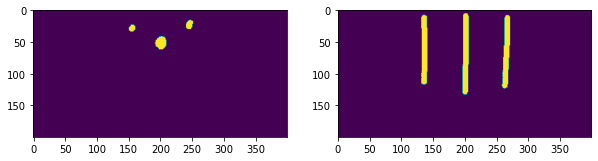

In [236]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
mask.show(chn=0, ctx=ax[0])
mask.show(chn=1, ctx=ax[1])

In [237]:
df.index[0]

'../data/training_data/160p.png'

In [251]:
def get_lbl_fn(img_fn: Path, df: pd.DataFrame):
    """
        Not used. Could use partial to assign the actual dataframe to the df argument
    """
    row = df.loc[img_fn]
    return row

def split_by_exp(val_exps):
    def _split_by_exp(x):
        if isinstance(x, Path) or isinstance(x, str):
            path = x
        elif isinstance(x, pd.Series):
            path = x.name 
        exp_code = get_exp_code(path)
        return exp_code in val_exps
            
    return _split_by_exp

val_exps = np.random.choice(exp_code, size=2, replace=False)
    
# splitter = RandomSplitter(valid_pct=0.1) # valid on random sample
splitter = FuncSplitter(split_by_exp(val_exps))

In [258]:
# check if splitter actually do what you want it to do

In [252]:
val_exps

array(['IT010', 'IT018'], dtype=object)

In [257]:
df.index[:5], df.index[-5:]

(Index(['../data/training_data/160p.png', '../data/training_data/200p.png',
        '../data/training_data/250p.png', '../data/training_data/300p.png',
        '../data/training_data/30p.png'],
       dtype='object', name='Image'),
 Index(['../data/training_data/IT018-00000014137217569700-0200.png',
        '../data/training_data/IT018-00000014175221355400-0200.png',
        '../data/training_data/IT018-00000014204224244600-0200.png',
        '../data/training_data/IT018-00000014278231616800-0200.png',
        '../data/training_data/IT018-00000014734277045800-0200.png'],
       dtype='object', name='Image'))

In [254]:
val_exps

array(['IT010', 'IT018'], dtype=object)

In [255]:
splitter(df.index[:5])

((#5) [0,1,2,3,4], (#0) [])

In [256]:
splitter(df.index[-5:])

((#0) [], (#5) [0,1,2,3,4])

In [259]:
# use the whole df as items
db = DataBlock(blocks=(TransformBlock(type_tfms=partial(RHEEDTensorImage.create, chnls_first=True)),
                       TransformBlock(type_tfms=partial(RHEEDTensorMask.create, chnls_first=True, shape=(200, 400)), 
                                      item_tfms=AddMaskCodes(codes=df.columns)),
                      ),
               get_items=lambda x: x,
               get_y = noop,
               get_x = noop,
               splitter=RandomSplitter(valid_pct=0.1)
              )

In [181]:
# db.summary(source=df)

In [260]:
ds = db.datasets(source=df)

<AxesSubplot:>

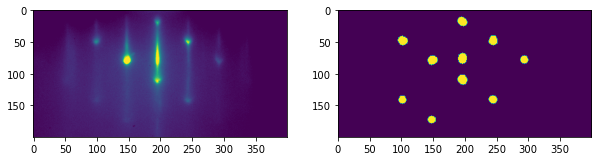

In [261]:
idx = 1
img = ds.train[idx][0]
msk = ds.train[idx][1]

_, ax = plt.subplots(1, 2, figsize=(10, 5))
img.show(ctx=ax[0])
msk.show(ctx=ax[1])

In [262]:
# bs or batchsize could be bigger like 16
dls = ds.dataloaders(bs=16, num_workers=4)

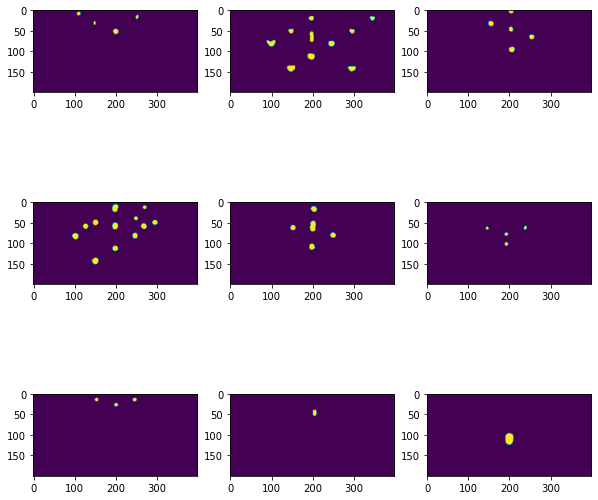

In [263]:
dls.show_batch(figsize=(10,10))

In [264]:
x, y = dls.one_batch()
type(x), type(y)

(rhana.labeler.unet.RHEEDTensorImage, rhana.labeler.unet.RHEEDTensorMask)

In [265]:
np.array(x.detach().cpu()).max()

0.9647059

In [266]:
# uncomment this line if you want to check your gpu usage
# !nvidia-smi

In [315]:
learn = unet_learner(dls, resnet18, loss_func=BCEWithLogitsLossFlat(), n_out=len(df.columns), metrics=[dice_metric])

In [316]:
# the fine tune iteration could be longer
# training dataset is quite small in our case

# for small dataset, try to avoid fitting the whole model for too long to prevent overfitting
learn.fine_tune(epochs=2, freeze_epochs=10)

epoch,train_loss,valid_loss,dice_metric,time
0,0.364226,0.265343,0.000000,00:04
1,0.255083,0.149922,0.020820,00:04
2,0.202951,0.176504,0.225011,00:04
3,0.177000,0.107631,0.225329,00:04
4,0.155183,0.077229,0.687811,00:04
5,0.136972,0.063901,0.633502,00:04
6,0.122479,0.057651,0.682254,00:04
7,0.109037,0.063651,0.753188,00:04
8,0.100989,0.053152,0.740495,00:04
9,0.092819,0.049708,0.742653,00:04


epoch,train_loss,valid_loss,dice_metric,time
0,0.061734,0.095261,0.545578,00:04
1,0.058463,0.053104,0.766124,00:04


In [347]:
learn.classes = ['spot', 'streak']

In [128]:
ls ../

data/     notebook/  requirements.txt  rhana.egg-info/  tests/
learner/  README.md  rhana/            setup.py


In [317]:
learner_folder = Path("../learner")
learner_folder.mkdir(exist_ok=True)

In [318]:
from datetime import datetime

In [319]:
learn_id = datetime.today().strftime("%H%M_%b%d_%Y")
learn_path = learner_folder/f"UNet_{learn_id}.pkl"
learn_path

Path('../learner/UNet_1647_Apr27_2022.pkl')

In [348]:
learn.export(learn_path)

# Inference

## Single rheed image

In [273]:
from pathlib import Path

In [274]:
from rhana.core import Rheed
from rhana.labeler.unet import RHEEDTensorImage

In [275]:
from fastai.vision.all import *

In [276]:
learner_folder = Path("../learner")

In [43]:
ls ../learner

UNet_1220_Apr27_2022.pkl  UNet_1605_Apr24_2022.pkl
UNet_1419_Apr27_2022.pkl  UNet_May6_2021_fixed.pkl


In [321]:
learn = load_learner(learner_folder/"UNet_1647_Apr27_2022.pkl")

In [278]:
!ls assets/LastImage

IT004.bin  IT008.png  IT012.bin  IT015.png  IT020.bin  IT023.png  IT028.bin
IT004.png  IT009.bin  IT012.png  IT016.bin  IT020.png  IT024.bin  IT028.png
IT006.bin  IT009.png  IT013.bin  IT016.png  IT021.bin  IT024.png  IT029.bin
IT006.png  IT010.bin  IT013.png  IT017.bin  IT021.png  IT025.bin  IT029.png
IT007.bin  IT010.png  IT014.bin  IT017.png  IT022.bin  IT025.png  IT030.bin
IT007.png  IT011.bin  IT014.png  IT018.bin  IT022.png  IT027.bin  IT030.png
IT008.bin  IT011.png  IT015.bin  IT018.png  IT023.bin  IT027.png


In [334]:
# IT029 is not in the train set
# This is generated in the second batch of experiment
sample = Path("assets/LastImage/IT030.bin")

In [335]:
rd = Rheed.from_kashiwa(sample)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

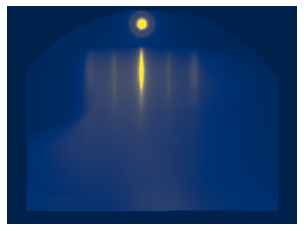

In [336]:
rd.plot_pattern()

In [337]:
# cropping parameter could be hand determined or generated with tracker 
proc_rd = rd.mean_clip(inplace=False)
proc_rd = proc_rd.crop(100, 170, 300, 570, inplace=False).min_max_scale(inplace=False)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

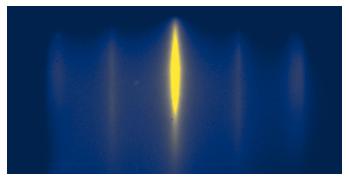

In [338]:
proc_rd.plot_pattern()

In [339]:
item = RHEEDTensorImage.create(np.tile(proc_rd.pattern, (3, 1, 1)))

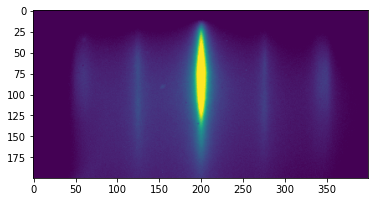

In [340]:
item.show()

In [341]:
result = learn.predict(item)

In [342]:
a, b, c = result

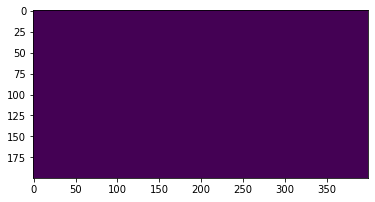

In [343]:
a.show(chn=0)

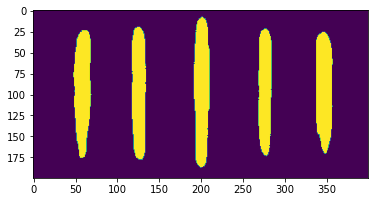

In [345]:
a.show(chn=1)

In [97]:
# since the image we use to analysis would be cropped eventually 
# the weird shape around the direct beam would be omitted
# user could include the masking for directed beam which would make it more robust on analyzing the full rheed pattern

## Inference with dataloader

In [ ]:
dls.test_dl() # add test dataloader